In [45]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import string



In [47]:
df=pd.read_csv("C:/Users/anusr/Downloads/archive/email_spam.csv",header=None,encoding='ISO-8859-1')
df

,0,1,2
0,title,text,type
1,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
2,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
3,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
4,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
...,...,...,...
80,Your application for the position of Child Pr...,"Dear Maryam, \n\n \n\nI would like to thank yo...",not spam
81,Your Kilimall Account is Ready - Shopping Now!,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...",not spam
82,Your Steam account: Access from new web or mob...,"Dear vladis163rus,\nHere is the Steam Guard co...",not spam
83,Your uploaded document is rejected,View In Browser | Log in\n \n \n\nSkrill logo\...,not spam


In [49]:
df.columns = ['title','text','target']
df.head()

,title,text,target
0,title,text,type
1,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
2,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
3,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
4,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam


In [50]:
df.size

255

In [51]:
df.shape

(85, 3)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   85 non-null     object
 1   text    85 non-null     object
 2   target  85 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [53]:
df.isna().sum()

title     0
text      0
target    0
dtype: int64

In [54]:
df['target'].value_counts()

target
not spam    58
spam        26
type         1
Name: count, dtype: int64

In [55]:
df.drop(df.index[0], inplace=True)


In [56]:
df['target'].value_counts()

target
not spam    58
spam        26
Name: count, dtype: int64

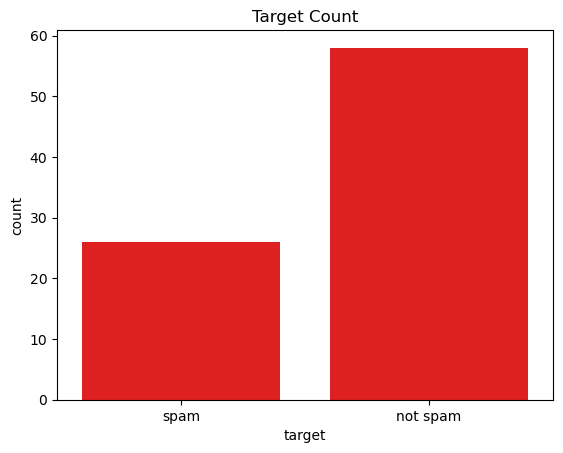

In [57]:
sns.countplot(x=df['target'],data=df,color='red')
plt.title('Target Count')
plt.show()

In [66]:
df.drop(['title'],axis=1,inplace=True) #we dont want this columns
df.head()

,text,target
1,"Hi James,\n\nHave you claim your complimentary...",spam
2,"\nalt_text\nCongratulations, you just earned\n...",not spam
3,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
4,"Hello,\n \nThank you for contacting the Virtua...",not spam
5,"Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [69]:
# df['target'].replace('Spam':1,'Not Spam':0],inplace=True)
df['target']=df['target'].map({'spam':1,'not spam':0})
df.head()

,text,target
1,"Hi James,\n\nHave you claim your complimentary...",1
2,"\nalt_text\nCongratulations, you just earned\n...",0
3,"Here's your GitHub launch code, @Mortyj420!\n ...",0
4,"Hello,\n \nThank you for contacting the Virtua...",0
5,"Hey Prachanda Rawal,\n\nToday's newsletter is ...",1


In [71]:
tweets=df.text
tweets

1     Hi James,\n\nHave you claim your complimentary...
2     \nalt_text\nCongratulations, you just earned\n...
3     Here's your GitHub launch code, @Mortyj420!\n ...
4     Hello,\n \nThank you for contacting the Virtua...
5     Hey Prachanda Rawal,\n\nToday's newsletter is ...
                            ...                        
80    Dear Maryam, \n\n \n\nI would like to thank yo...
81    Dear Customer,\n\nWelcome to Kilimall, Thanks ...
82    Dear vladis163rus,\nHere is the Steam Guard co...
83    View In Browser | Log in\n \n \n\nSkrill logo\...
84    You've received a gift!\nSign in to your Bard ...
Name: text, Length: 84, dtype: object

In [73]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anusr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anusr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anusr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [75]:
# tokenization
from nltk.tokenize import TweetTokenizer
TK=TweetTokenizer()
tweets=tweets.apply(lambda x:TK.tokenize(x)) # apply(lambda x:' '.join(x))
tweets

1     [Hi, James, ,, Have, you, claim, your, complim...
2     [alt_text, Congratulations, ,, you, just, earn...
3     [Here's, your, GitHub, launch, code, ,, @Morty...
4     [Hello, ,, Thank, you, for, contacting, the, V...
5     [Hey, Prachanda, Rawal, ,, Today's, newsletter...
                            ...                        
80    [Dear, Maryam, ,, I, would, like, to, thank, y...
81    [Dear, Customer, ,, Welcome, to, Kilimall, ,, ...
82    [Dear, vladis, 163rus, ,, Here, is, the, Steam...
83    [View, In, Browser, |, Log, in, Skrill, logo, ...
84    [You've, received, a, gift, !, Sign, in, to, y...
Name: text, Length: 84, dtype: object

In [77]:
# now the tokens are in list form, we need space separation, bcz if we work with comma need more preprocessing 
tweets= tweets.apply(lambda x:' '.join(x))
tweets

1     Hi James , Have you claim your complimentary g...
2     alt_text Congratulations , you just earned 500...
3     Here's your GitHub launch code , @Mortyj420 ! ...
4     Hello , Thank you for contacting the Virtual R...
5     Hey Prachanda Rawal , Today's newsletter is Ja...
                            ...                        
80    Dear Maryam , I would like to thank you for yo...
81    Dear Customer , Welcome to Kilimall , Thanks s...
82    Dear vladis 163rus , Here is the Steam Guard c...
83    View In Browser | Log in Skrill logo Money mov...
84    You've received a gift ! Sign in to your Bard ...
Name: text, Length: 84, dtype: object

In [79]:
# remove special characters, we can use replace
tweets=tweets.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

1     Hi James   Have you claim your complimentary g...
2     alt text Congratulations   you just earned 500...
3     Here s your GitHub launch code    Mortyj420   ...
4     Hello   Thank you for contacting the Virtual R...
5     Hey Prachanda Rawal   Today s newsletter is Ja...
                            ...                        
80    Dear Maryam   I would like to thank you for yo...
81    Dear Customer   Welcome to Kilimall   Thanks s...
82    Dear vladis 163rus   Here is the Steam Guard c...
83    View In Browser   Log in Skrill logo Money mov...
84    You ve received a gift   Sign in to your Bard ...
Name: text, Length: 84, dtype: object

In [81]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

1     James Have you claim your complimentary gift y...
2     alt text Congratulations you just earned 500 Y...
3     Here your GitHub launch code Mortyj420 octocat...
4     Hello Thank you for contacting the Virtual Rew...
5     Hey Prachanda Rawal Today newsletter Jam Packe...
                            ...                        
80    Dear Maryam would like thank you for your appl...
81    Dear Customer Welcome Kilimall Thanks much for...
82    Dear vladis 163rus Here the Steam Guard code y...
83    View Browser Log Skrill logo Money movers make...
84    You received gift Sign your Bard Explorers Ind...
Name: text, Length: 84, dtype: object

In [83]:
from nltk.stem import SnowballStemmer
data=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[data.stem(i.lower()) for i in TK.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

1     jame have you claim your complimentari gift ye...
2     alt text congratul you just earn 500 you compl...
3     here your github launch code mortyj 420 octoca...
4     hello thank you for contact the virtual reward...
5     hey prachanda rawal today newslett jam pack wi...
                            ...                        
80    dear maryam would like thank you for your appl...
81    dear custom welcom kilimal thank much for join...
82    dear vladi 163rus here the steam guard code yo...
83    view browser log skrill logo money mover maker...
84    you receiv gift sign your bard explor india co...
Name: text, Length: 84, dtype: object

In [85]:
# stopwors removing
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in TK.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

1     jame claim complimentari gift yet compil speci...
2     alt text congratul earn 500 complet follow off...
3     github launch code mortyj 420 octocat stand ne...
4     hello thank contact virtual reward center virt...
5     hey prachanda rawal today newslett jam pack ev...
                            ...                        
80    dear maryam would like thank applic role child...
81    dear custom welcom kilimal thank much join kil...
82    dear vladi 163rus steam guard code need login ...
83    view browser log skrill logo money mover maker...
84    receiv gift sign bard explor india communiti c...
Name: text, Length: 84, dtype: object

In [87]:
y=df['target'].values
y

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)

X_seq = tokenizer.texts_to_sequences(tweets)



In [104]:
# X_seq

In [94]:
print(X_seq[0])


[663, 496, 1105, 132, 497, 1106, 133, 498, 132, 379, 664, 250, 499, 25, 665, 251, 11, 496, 500, 496, 13, 1107, 304, 1108]


In [96]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X_seq, maxlen=150)


In [98]:
print(X_pad.shape)


(84, 150)


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    y,
    test_size=0.2,
    random_state=42
)

X_train = X_train.astype('int32')
X_test  = X_test.astype('int32')


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=150),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])


C:\Users\anusr\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [112]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [114]:
model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 563ms/step - accuracy: 0.5224 - loss: 0.7016 - val_accuracy: 0.6471 - val_loss: 0.6653
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.7313 - loss: 0.5429 - val_accuracy: 0.3529 - val_loss: 0.7150
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8806 - loss: 0.4310 - val_accuracy: 0.5294 - val_loss: 0.6972
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9403 - loss: 0.3273 - val_accuracy: 0.5294 - val_loss: 0.6721
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9403 - loss: 0.2573 - val_accuracy: 0.4118 - val_loss: 0.7000


In [116]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4118 - loss: 0.7000
Test Accuracy: 0.4117647111415863


In [118]:
emails = [
    "Congratulations you won a free prize",
    "Please attend the meeting tomorrow"
]

seq = tokenizer.texts_to_sequences(emails)
pad = pad_sequences(seq, maxlen=150)

predictions = model.predict(pad)

for i, p in enumerate(predictions):
    print("Spam" if p > 0.5 else "Not Spam")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
Not Spam
Not Spam
